# Explore here

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [4]:
data_useful = data[subset:=['Longitude', 'Latitude', 'MedInc']].copy()

In [5]:
data_useful.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Longitude  20640 non-null  float64
 1   Latitude   20640 non-null  float64
 2   MedInc     20640 non-null  float64
dtypes: float64(3)
memory usage: 483.9 KB


In [6]:
data_useful.head()

,Longitude,Latitude,MedInc
0,-122.23,37.88,8.3252
1,-122.22,37.86,8.3014
2,-122.24,37.85,7.2574
3,-122.25,37.85,5.6431
4,-122.25,37.85,3.8462


In [7]:
data_useful.isna().sum().sum()

0

Tenemos cero valores nulos en este data set. Sabemos que tenemos solo 3 caracteristicas y dos de ellas son geograficas por lo que es interesante el analisis exploratorio que se puede hacer con pocas variables y un data set relativamente limpio solo buscamos visualizarlas de forma rapida.

(array([2247., 7436., 6098., 2990., 1060.,  428.,  178.,   93.,   47.,
          63.]),
 array([ 0.4999 ,  1.94992,  3.39994,  4.84996,  6.29998,  7.75   ,
         9.20002, 10.65004, 12.10006, 13.55008, 15.0001 ]),
 <BarContainer object of 10 artists>)

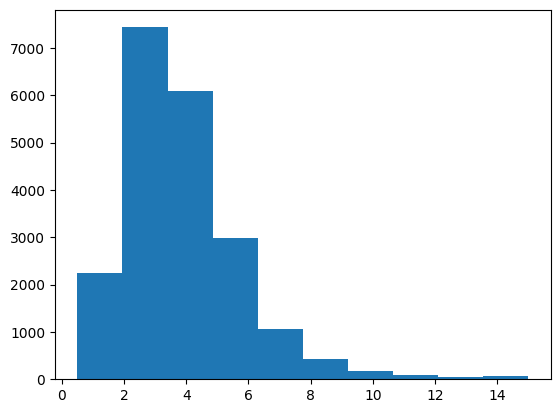

In [8]:
plt.hist(data_useful['MedInc'])

In [9]:
X_train, X_test = train_test_split(data_useful, test_size=0.2, random_state=42)

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

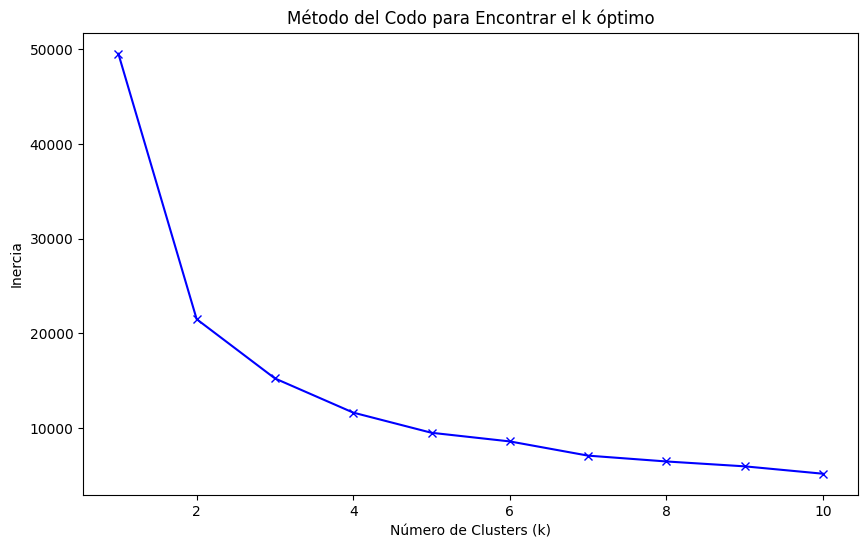

In [11]:
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo para Encontrar el k óptimo')
plt.show()


En este caso, al utilizar el metodo del codo podemos ver que se tiene un punto que resalta por completo cuando usamos solo 2 clusters, sin embargo, seguimos teniendo una disminucion relativamente significante hasta el punto 5, donde en el el punto 5 y 6 existe un comportamiento contraintuitivo, donde parece que se aplana la curva, para entender esto de forma mas clara, haremos 2 plots mas, uno con unicamente 6 puntos de numero de clusters y uno con 30, para ver como el aumento y disminucion de la magnitud deja ver mas claro el comportamiento de nuestro modelo en cuanto al numero de clusters optimo. 

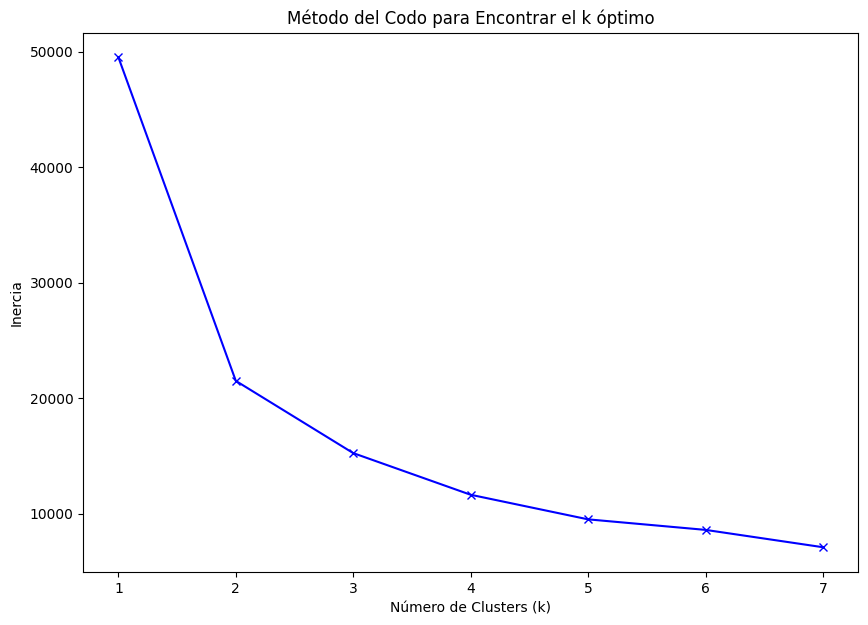

In [12]:
inertia = []
K = range(1, 8)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 7))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo para Encontrar el k óptimo')
plt.show()


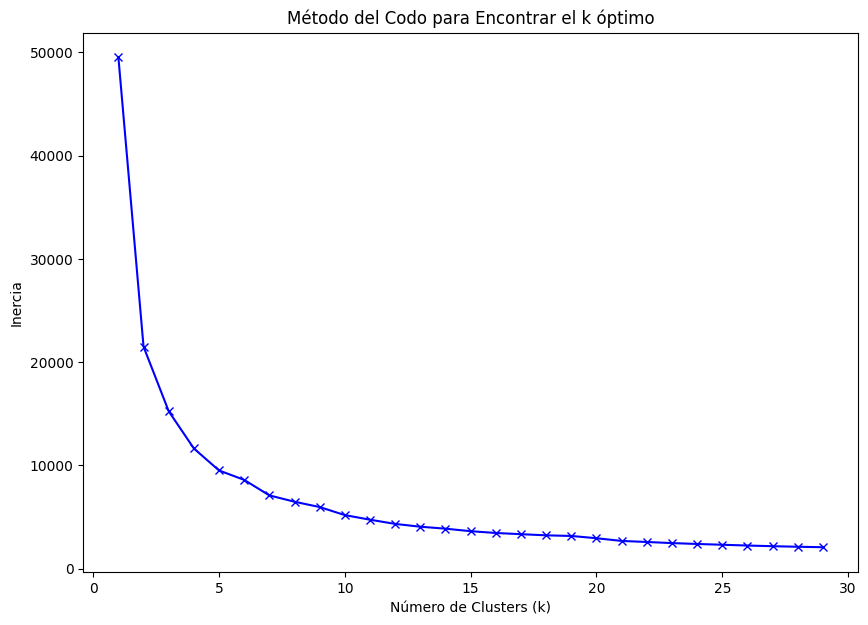

In [13]:
inertia = []
K = range(1, 30)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 7))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo para Encontrar el k óptimo')
plt.show()

En este ultimo grafico es donde se ve de forma mas clara que el codo esta en un punto entre el numero de clusters igual a 5 y 7, con la peculiaridad de tener una pendiente mucho menos pronunciada entre 5 y 6, seguido de una pendiente mas pronunciada entre 6 y 7, esto nos indica una inestabilidad en la forma en que nuestro modelo esta agrupando los datos, en realidad con el grafico que podemos ver arriba podemos concluir que el numero optimo de clusters se encuentra en un punto entre 5 y10 clusters.

Pero estamos hablando de analisis no adivinanzas, por lo que primero explicaremos porque se tiene este comportamiento, ya que dentro de la literatura podemos encontrar que una razon para encontrar este tipo de comportamiento se debe a que al pasar de un numero de clusters de 5 a 6 nuestro algoritmom esta dividiendo un cluster grande y con alta similitud en 2 clusters mas pequenios que no  presentan una mejora en la forma global de agrupaciones, por lo que nuestra inercia no disminuye de forma significativa, sin embargo al hacer otra division, generando otro cluster en el punto de 6 a 7 clusters el algoritmo encuentra una mejor subdivision de los datos y con ello mejora la agrupacion, lo que si nos da una disminucion signigicativa en la inercia. 

Esto siginifica que tener 5 o 7 clusters nos dara una configuracion mas estable y mejores agrupaciones que tener 6 clusters.

Otra razon por la que podriamos estar experimentando este comportamiento anomalo, es debido al posible ruiod en el dataset, lo que hace que el algoritmo este influenciado por este ruido. 

Debido a este comportamiento inestable, se debe hacer una evaluacion adicional, en la cual vamos a analizar el coeficiente de silueta para los valores de 5 >= K <= 10, para determinar el valor optimo de clusters. 


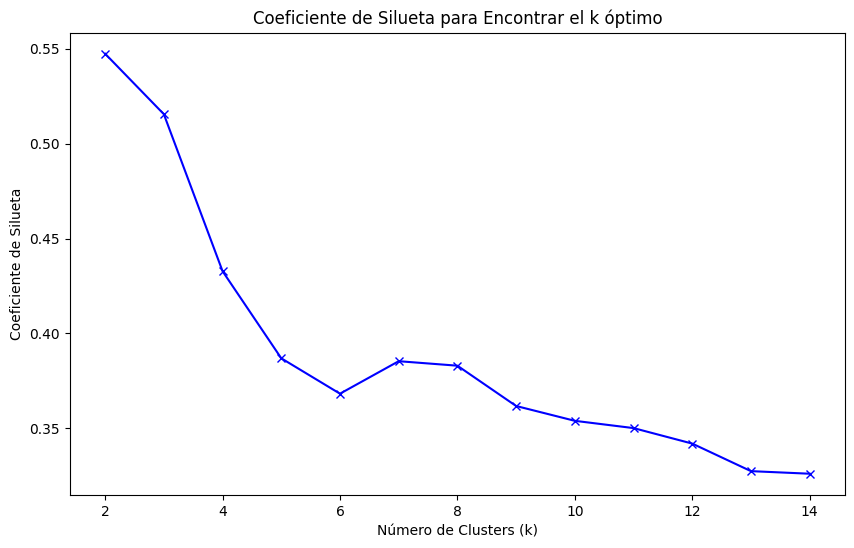

In [14]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
K = range(2, 15)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_scaled)
    score = silhouette_score(X_train_scaled, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Coeficiente de Silueta')
plt.title('Coeficiente de Silueta para Encontrar el k óptimo')
plt.show()

Sabemos que el coeficiente de silueta es la metrica que nos ayuda a evaluar la calidad de los clusters que se forman en cada iteracion, esto es referente a la calidad de cluster que proporciona el algoritmo tomando en cuenta el numero de clusters.

Una vez que comparamos los resultados de nuestro grafico de coeficiente de silueta podemos comprobar que el numero de clusters optimo, sera mayor o menor a 6 de forma excluyente.

Ahora es necesario mencionar que si bien, el mejor valor de disminucion de inercia y el mejor valor de coeficiente de silueta esta en formar 2 clusters, lo que buscamos en clasificar los hogares de acuerdo a su region e ingreso medio, con lo que 2 agrupaciones no servirian para darnos una imagen representativa. 

Por esto es que tenemos que tomar en cuenta que tanto 5 como 7 clusters presentan un comportamiento adecuado para ser este nuestro punto optimo de clusters, utilizaremos el 7 como nuestro punto optimo debido a que lo que buscamos no solo es el numero optimo, si no que buscamos clasificar de forma que podamos entender y visualizar de mejor forma las agrupaciones, Por lo que si tenemos un comportamiento practicamente igual el numero mas alto nos sera mas conveniente para clasificar en este caso ya que sigue siendo un numero util para continuar el analisis. 

Continuamos y terminamos el analisis e implementacion de modelo en app.ipynb

In [21]:
data_useful.to_csv(r'C:\Users\wipip\OneDrive\Documentos\GitHub\UL--K-means--main\data\processed\data_procesada.csv')